In [ ]:
The final project of the second semester of the Iran University of Science and Technology in the field of computer science

## Importing libraries

In [1]:
# Importing frequently used libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # For machine learning and neural networks
import pickle  # For serializing and de-serializing Python object structures
from tensorflow import keras  # For neural networks
from tensorflow.keras.models import Sequential, Model, load_model  # For sequential and functional API models
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, InputLayer  # For different types of layers in a neural network
from tensorflow.keras.optimizers import Adam  # For the Adam optimizer
from tensorflow.keras.metrics import categorical_crossentropy, MeanSquaredError  # For different types of loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time data augmentation
from tensorflow.keras.utils import to_categorical  # For one-hot encoding
from tensorflow.keras.datasets import cifar100  # CIFAR-100 dataset
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.model_selection import KFold  # For K-Fold cross validation
import itertools  # For creating iterators for efficient looping
import os  # For interacting with the OS
import shutil  # For high-level file operations
import torch  # PyTorch library for machine learning
import random  # For generating random numbers
import glob  # For finding all the pathnames matching a specified pattern
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
import warnings  # For warning control
import tensorflow.keras.applications.efficientnet as efn  # For EfficientNet model
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore future warnings
%matplotlib inline  # For inline backend


# Import the necessary module from the sklearn library
from sklearn.feature_extraction.text import TfidfTransformer

# The TfidfTransformer is used to transform a count matrix to a normalized tf-idf representation
# tf-idf stands for term frequency-inverse document frequency, which are the components of the resulting scores assigned to each word.
# Term Frequency: This summarizes how often a given word appears within a document.
# Inverse Document Frequency: This downscales words that appear a lot across documents.

# Create an instance of TfidfTransformer
# By default, it applies "l2" normalization which means the output rows will have unit norm.
# The "smooth_idf=False" means the formula does not add one to the document frequencies, as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions.
tfidf_transformer = TfidfTransformer(smooth_idf=False)

# Now, you can use the `fit` and `transform` methods of this instance on your data.
# For example:
# tfidf_transformer.fit(raw_data)
# tfidf_data = tfidf_transformer.transform(raw_data)

UsageError: unrecognized arguments: # For inline backend


## Importing data

In [2]:
# The `read_csv` function is used to read a CSV (comma-separated values) file into DataFrame.
# The file path is passed as a raw string to the function.

# Define the file path
file_path = r'C:\Users\RezaHardMan\Documents\Python projects\myLearningProject\Jafar\Amazon_DataSet.csv'

# Read the CSV data file into a pandas DataFrame
# A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
# Here, 'amazon_df' is the DataFrame where the content of the csv file is stored.
amazon_df = pd.read_csv(file_path)

# Now, 'amazon_df' contains the data from the 'Amazon_DataSet.csv' file and you can perform operations on this DataFrame.
# For example, to view the first 5 rows of the DataFrame, you can use: print(amazon_df.head())


In [2]:
# The 'head' function is used to get the first n rows of a DataFrame.
# By default, it returns the first 5 rows. You can specify a different number as an argument if you want more (or fewer) rows.

# Here, we're using it without any arguments, so it will return the first 5 rows of the DataFrame 'amazon_df'.
first_rows = amazon_df.head()

# Now, 'first_rows' contains the first 5 rows of 'amazon_df'.
# You can print this variable to see its contents.
print(first_rows)

,reviewText,Sentiment
0,This is a one of the best apps acording to a b...,Positive
1,This is a pretty good version of the game for ...,Positive
2,this is a really cool game. there are a bunch ...,Positive
3,"This is a silly game and can be frustrating, b...",Positive
4,This is a terrific game on any pad. Hrs of fun...,Positive


## Label Normalization

In [4]:
# Import the necessary modules from the sklearn library
from sklearn import linear_model, preprocessing

# LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1
# This can be useful for writing efficient Cython routines
le = preprocessing.LabelEncoder() 

# Here we fit label encoder and return encoded labels
# 'fit_transform' is a function that fits label encoder and return encoded labels
# In this case, we're transforming the 'Sentiment' column of the 'amazon_df' DataFrame
amazon_df['Sentiment'] = le.fit_transform(amazon_df["Sentiment"])

# Now, 'Sentiment' column in 'amazon_df' has been transformed from categorical data to numerical data

# We're setting 'X' to be the 'reviewText' column of 'amazon_df'
# This will be our feature set
X = amazon_df["reviewText"]

# We're setting 'y' to be the 'Sentiment' column of 'amazon_df'
# This will be our target variable
y = amazon_df["Sentiment"]


In [7]:
# Import the regular expression module
import re

def normalize(data):
    # Initialize an empty list to store the normalized data
    normalized = []

    # Loop over each item in the data
    for i in data:
        # Convert the item to lowercase
        i = i.lower()

        # Use a regular expression to remove any urls from the item
        # 'https?://\S+|www\.\S+' matches http, https, and www urls
        i = re.sub('https?://\S+|www\.\S+', '', i)

        # Use a regular expression to replace non-word characters (anything other than a letter, digit or underscore) with a space
        # '\\W' matches any non-word character
        i = re.sub('\\W', ' ', i)

        # Use a regular expression to remove newline characters
        # '\n' matches newline characters
        i = re.sub('\n', '', i)

        # Use a regular expression to replace one or more spaces with a single space
        # ' +' matches one or more spaces
        i = re.sub(' +', ' ', i)

        # Use a regular expression to remove leading spaces
        # '^ ' matches a space at the start of the string
        i = re.sub('^ ', '', i)

        # Use a regular expression to remove trailing spaces
        # ' $' matches a space at the end of the string
        i = re.sub(' $', '', i)

        # Add the normalized item to the list
        normalized.append(i)

    # Return the list of normalized items
    return normalized

# Call the normalize function on 'X'
X = normalize(X)


## Training data

In [9]:
# Import the necessary modules from the sklearn library
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# CountVectorizer converts a collection of text documents to a matrix of token counts
# This implementation produces a sparse representation of the counts
count_vect = CountVectorizer()

# fit_transform learns the vocabulary dictionary and return term-document matrix
# This is equivalent to fit followed by transform, but more efficiently implemented
Xtt = count_vect.fit_transform(X)

# TfidfTransformer transforms a count matrix to a normalized tf or tf-idf representation
# When use_idf=False, the output is the term frequency (tf) in each document
tf_transformer = TfidfTransformer(use_idf=False).fit(Xtt)

# Now we transform our count-matrix to a tf-idf representation
X = tf_transformer.transform(Xtt)

# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: 
# for training data and for testing data. With this function, you don't need to divide the dataset manually.
# The testing subset is for building your model. 
# The testing subset is for using the model on unknown data to evaluate the performance of the model.
# Here we're using 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Import the necessary module from the sklearn library
from sklearn.naive_bayes import MultinomialNB

# MultinomialNB implements the naive Bayes algorithm for multinomially distributed data
# It is one of the two classic naive Bayes variants used in text classification
# The distribution is parametrized by vectors for each class, which is stored in the `coef_` attribute of the fitted object.
# The `fit` function is used to train the algorithm on the data

# Here we're creating an instance of MultinomialNB and fitting it to our training data
# 'X_train' is the training data
# 'y_train' are the labels for the training data
clf = MultinomialNB().fit(X_train, y_train)

In [11]:
# The 'predict' function of the classifier is used to predict the labels of the test data
# Here we're using it to predict the labels of 'X_test'
y_pred = clf.predict(X_test)

# We're calculating the number of mislabeled points (i.e., the number of test points that were not correctly classified)
# This is done by comparing the predicted labels ('y_pred') to the true labels ('y_test')
# The '!=' operator returns a boolean array where 'True' indicates inequality (i.e., mislabeling)
# The 'sum' function then counts the number of 'True' values (i.e., the number of mislabeled points)

# We're then printing the number of mislabeled points and the total number of points
# 'X_test.shape[0]' gives the total number of points (i.e., the number of rows in 'X_test')
print("Number of mislabeled points out of a total %d points : %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 4000 points : 950


In [12]:
# Import the necessary module from the sklearn library
from sklearn.linear_model import SGDClassifier

# SGDClassifier stands for Stochastic Gradient Descent Classifier
# It implements regularized linear models with stochastic gradient descent (SGD) learning
# It is well suited for large scale and sparse machine learning problems

# Here we're creating an instance of SGDClassifier
# 'loss' parameter determines the loss function to be used
# 'hinge' loss gives a linear SVM
# 'penalty' parameter determines the penalty (aka regularization term) to be used
# 'l2' indicates that we should add half of the square of the L2 norm of the weight vector to the loss function
# 'alpha' parameter is a constant that multiplies the regularization term
# 'random_state' parameter is the seed of the pseudo random number generator to use when shuffling the data
# 'max_iter' parameter determines the maximum number of passes over the training data (aka epochs)
# 'tol' parameter is the stopping criterion
model = SGDClassifier(loss='hinge', penalty='l2',
    alpha=1e-5, random_state=42, max_iter=500, tol=None)

# The 'fit' function is used to train the algorithm on the data
# Here we're fitting the model to our training data
# 'X_train' is the training data
# 'y_train' are the labels for the training data
model.fit(X_train, y_train)

# The 'predict' function of the classifier is used to predict the labels of the test data
# Here we're using it to predict the labels of 'X_test'
y_pred2 = model.predict(X_test)

In [13]:
# We're calculating the number of mislabeled points (i.e., the number of test points that were not correctly classified)
# This is done by comparing the predicted labels ('y_pred2') to the true labels ('y_test')
# The '!=' operator returns a boolean array where 'True' indicates inequality (i.e., mislabeling)
# The 'sum' function then counts the number of 'True' values (i.e., the number of mislabeled points)

# We're then printing the number of mislabeled points and the total number of points
# 'X_test.shape[0]' gives the total number of points (i.e., the number of rows in 'X_test')
print("Number of mislabeled points out of a total %d points : %d"
     % (X_test.shape[0], (y_test != y_pred2).sum()))

Number of mislabeled points out of a total 4000 points : 396


## Visualizing the Results

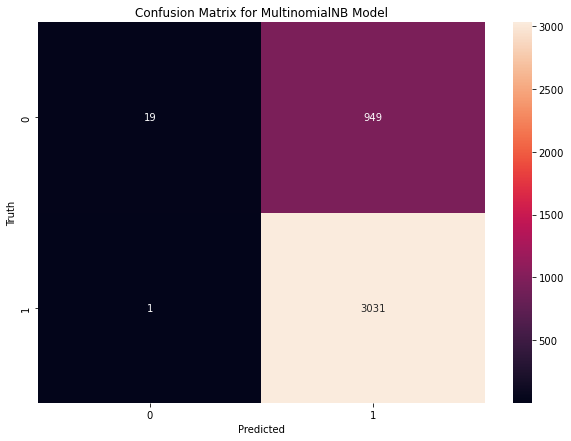

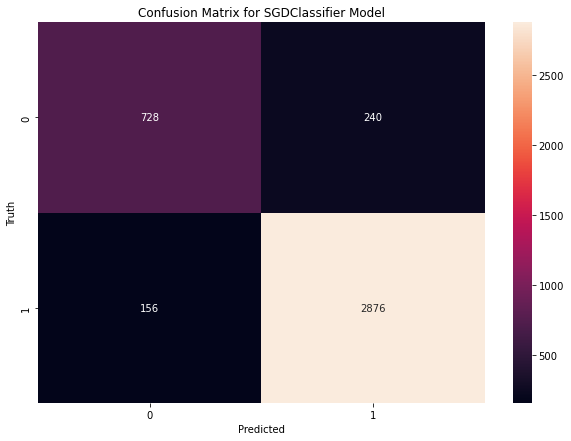

In [14]:
# Import the necessary module from the sklearn library
import seaborn as sns

# Generate the confusion matrix for the first model (MultinomialNB)
cm1 = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.title('Confusion Matrix for MultinomialNB Model')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Generate the confusion matrix for the second model (SGDClassifier)
cm2 = confusion_matrix(y_test, y_pred2)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix for SGDClassifier Model')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
